In [21]:
import pandas as pd
import numpy as np

In [22]:
cleaned_data = pd.read_csv('dataset/used_cars_cleaned.csv')

In [23]:
cleaned_data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,is_condition_imputed
0,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,Unknown,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,False
1,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,full-size,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,False
2,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,Unknown,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,False
3,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,full-size,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,False
4,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,False


In [24]:
cleaned_data.shape

(246680, 20)

In [25]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246680 entries, 0 to 246679
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   region                246680 non-null  object 
 1   price                 246680 non-null  int64  
 2   year                  246680 non-null  int64  
 3   manufacturer          246680 non-null  object 
 4   model                 246680 non-null  object 
 5   condition             246680 non-null  object 
 6   cylinders             246680 non-null  object 
 7   fuel                  246680 non-null  object 
 8   odometer              246680 non-null  float64
 9   title_status          246680 non-null  object 
 10  transmission          246680 non-null  object 
 11  drive                 246680 non-null  object 
 12  size                  246680 non-null  object 
 13  type                  246680 non-null  object 
 14  paint_color           246680 non-null  object 
 15  

In [26]:
cleaned_data.describe()

,price,year,odometer,lat,long
count,246680.000000,246680.000000,246680.000000,246566.000000,246566.000000
mean,26601.675823,2013.666422,67549.955594,38.406475,-94.954036
std,14307.718128,8.855929,49938.836949,6.056005,18.657175
min,10020.000000,1910.000000,0.000000,-38.115380,-159.719900
25%,15999.000000,2013.000000,26852.750000,34.180000,-111.842800
50%,23990.000000,2016.000000,57899.000000,38.935242,-89.010000
75%,33590.000000,2018.000000,99575.000000,42.364188,-81.334900
max,470000.000000,2022.000000,241292.000000,65.735076,139.691700


# Exploratory Data Analysis

In [27]:
excluded_cols = ['model', 'description', 'lat', 'long']

In [28]:
cleaned_data = cleaned_data.drop(columns=excluded_cols)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
num_cols = cleaned_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = cleaned_data.select_dtypes(include=['object']).columns

In [31]:
low_cardinal_cat_cols = [col for col in cat_cols if cleaned_data[col].nunique() < 30]
high_cardinal_cat_cols = [col for col in cat_cols if cleaned_data[col].nunique() >= 30]

In [32]:
print("Numerical Columns:", num_cols)
print("Categorical Columns:", low_cardinal_cat_cols, high_cardinal_cat_cols)

Numerical Columns: Index(['price', 'year', 'odometer'], dtype='object')
Categorical Columns: ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'] ['region', 'manufacturer', 'state']


## Univariate Analysis

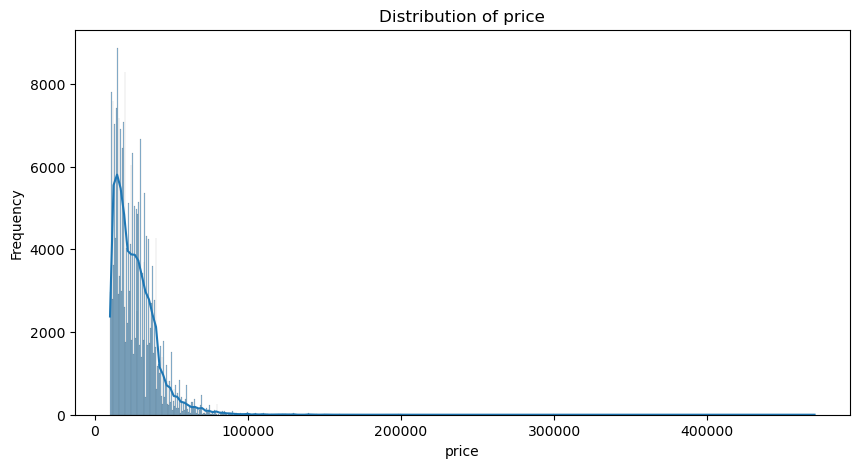

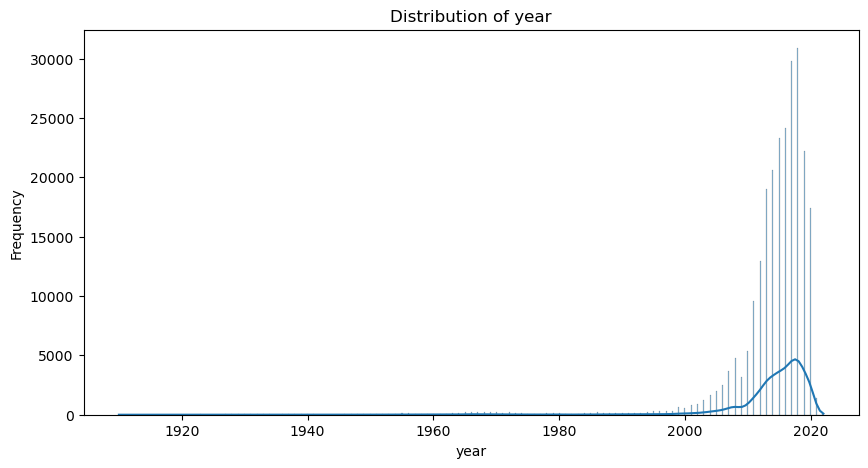

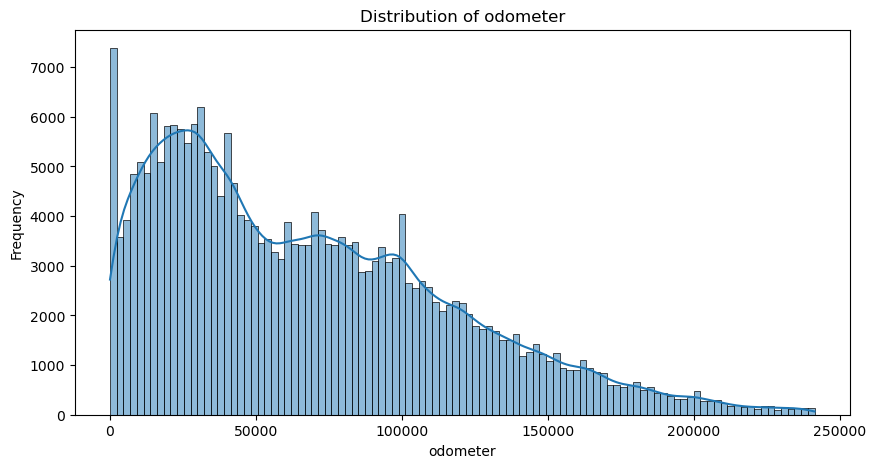

In [33]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(cleaned_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

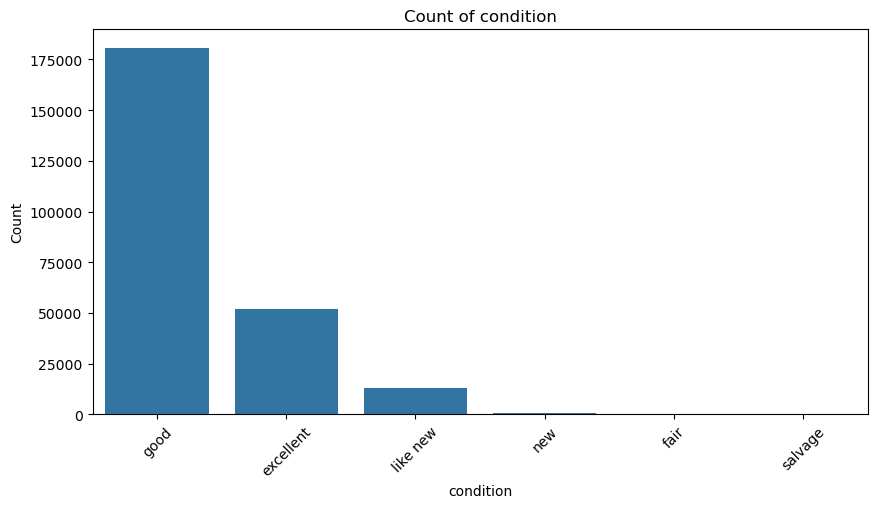

condition
good         180774
excellent     52009
like new      12822
new             746
fair            289
salvage          40
Name: count, dtype: int64


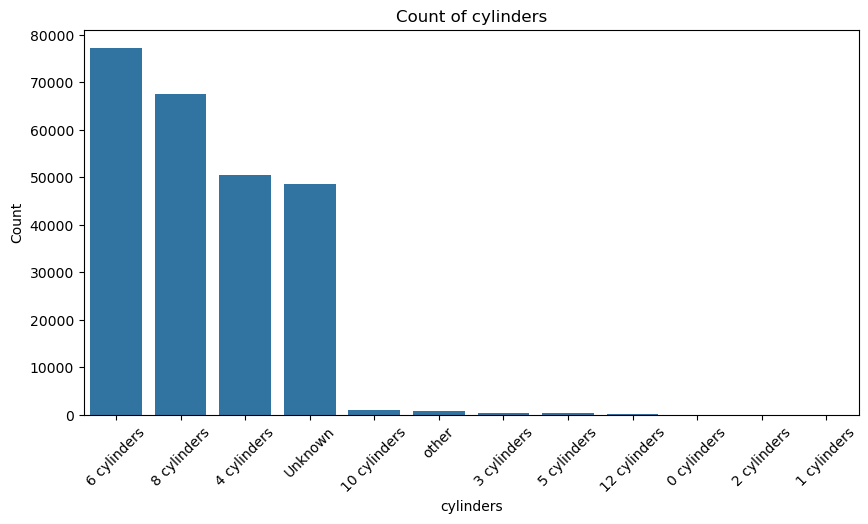

cylinders
6 cylinders     77163
8 cylinders     67519
4 cylinders     50502
Unknown         48663
10 cylinders     1023
other             812
3 cylinders       430
5 cylinders       404
12 cylinders      154
0 cylinders         7
2 cylinders         2
1 cylinders         1
Name: count, dtype: int64


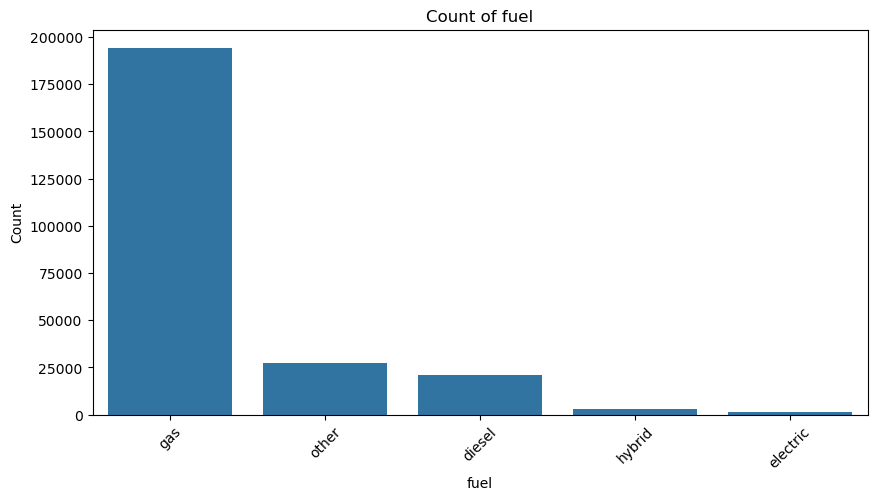

fuel
gas         194159
other        27071
diesel       21163
hybrid        2906
electric      1381
Name: count, dtype: int64


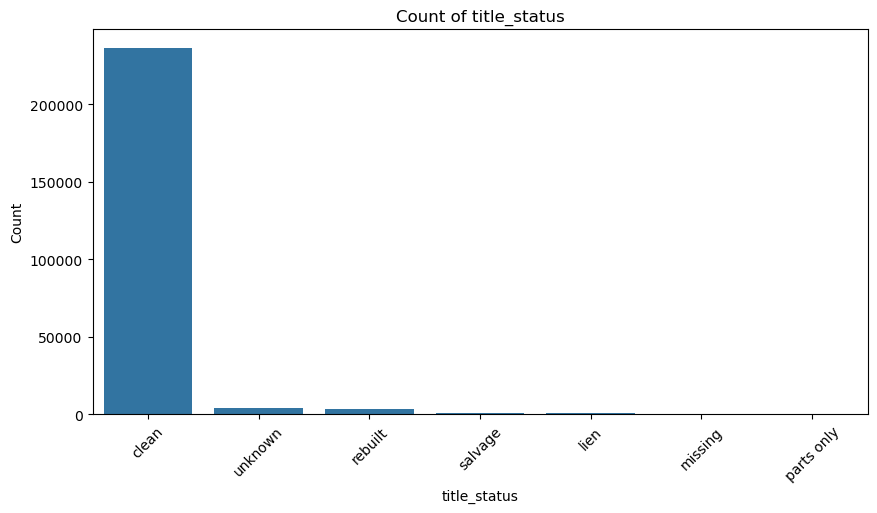

title_status
clean         236478
unknown         4200
rebuilt         3603
salvage         1239
lien            1059
missing           89
parts only        12
Name: count, dtype: int64


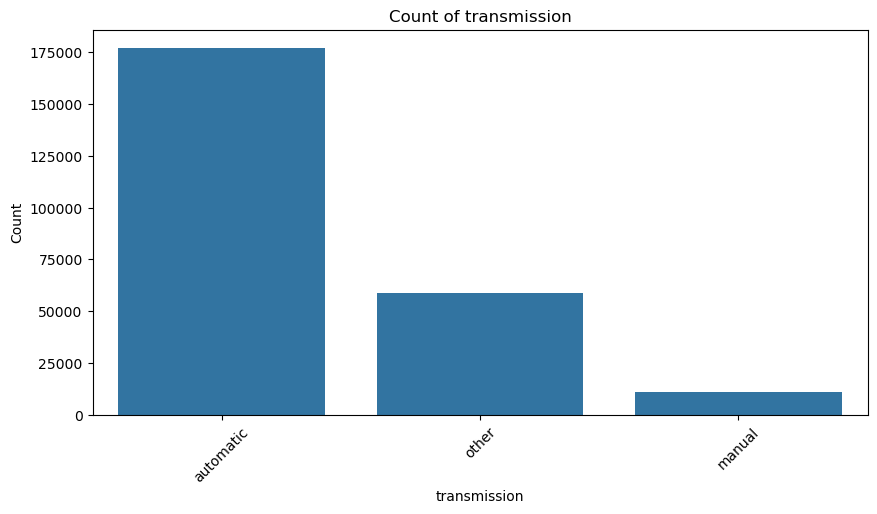

transmission
automatic    176866
other         58922
manual        10892
Name: count, dtype: int64


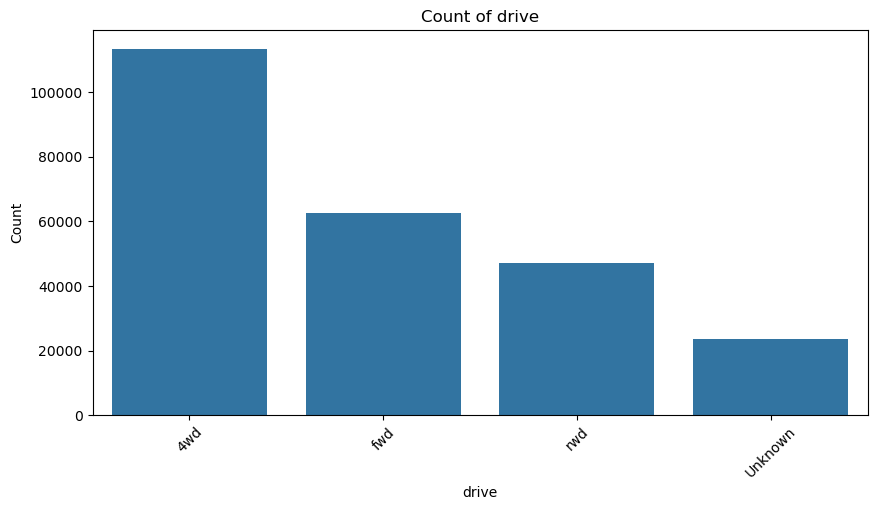

drive
4wd        113449
fwd         62499
rwd         47243
Unknown     23489
Name: count, dtype: int64


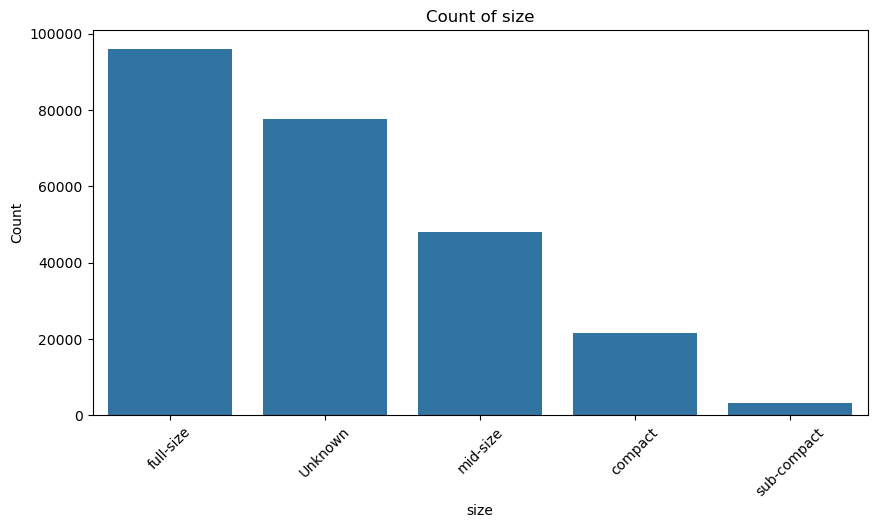

size
full-size      96099
Unknown        77756
mid-size       47991
compact        21586
sub-compact     3248
Name: count, dtype: int64


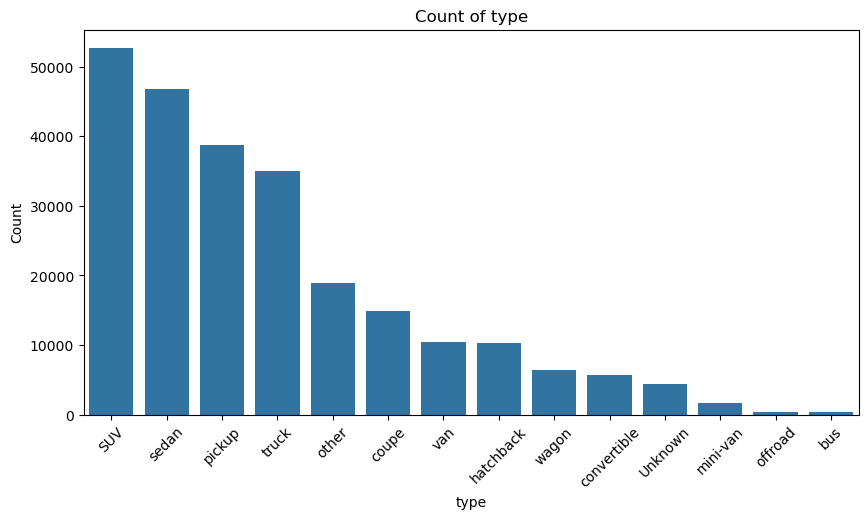

type
SUV            52680
sedan          46858
pickup         38682
truck          34956
other          18891
coupe          14864
van            10482
hatchback      10251
wagon           6470
convertible     5649
Unknown         4457
mini-van        1701
offroad          396
bus              343
Name: count, dtype: int64


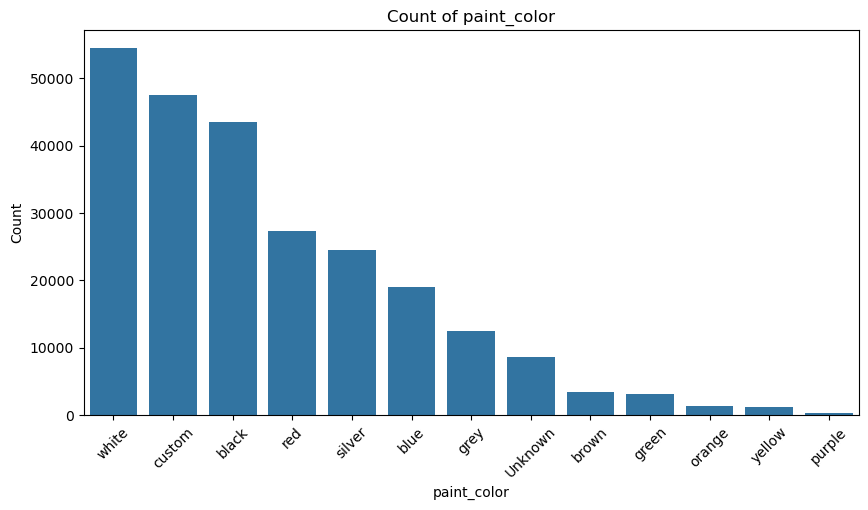

paint_color
white      54440
custom     47523
black      43497
red        27325
silver     24455
blue       18942
grey       12497
Unknown     8606
brown       3407
green       3103
orange      1324
yellow      1242
purple       319
Name: count, dtype: int64


In [38]:
for col in low_cardinal_cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=cleaned_data, x=col, order=cleaned_data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
    print(cleaned_data[col].value_counts())